Super Mario Gym
This jupyter notebook is used to help you understand the Super Mario Gym environment.

In [ ]:
! pip install -r requirements.txt # Or use your virtual environment

In [1]:
from game import *

env = Mario(n_stack=4)
state = env.reset()
obs, reward, done, episode_info = env.step(env.env.action_space.sample())
n_stack = obs.shape[0]
print(f"Obs shape: {obs.shape}, reward: {reward}, done: {done}, episode_info: {episode_info}")

Obs shape: (4, 13, 16), reward: 0.0, done: False, episode_info: None


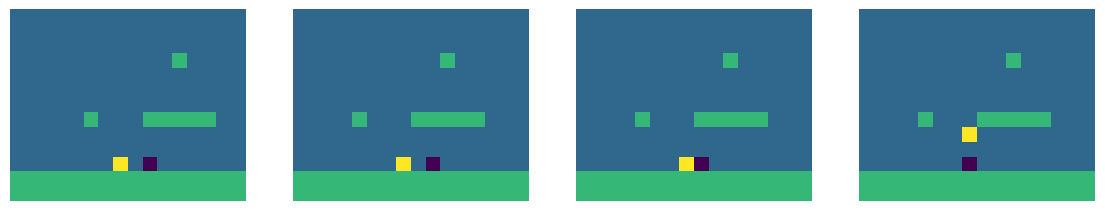

In [2]:
# Visualize the environment
# Get the initial observation
# test env_wrap
import matplotlib.pyplot as plt
done = True
for i in range(150):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())


fig, ax = plt.subplots(1, n_stack, figsize=(14,10))
for i in range(n_stack):
    ax[i].imshow(state[n_stack-i-1,:,:], vmin=-1, vmax=2)
    ax[i].axis('off')
plt.show()

Load the trained model

In [1]:
# Select a pre-trained model
from game import Mario
from model import load_model
import os

MODEL_DIR = '../results/ppo_experiment_gif/checkpoints/'
MODEL_NAME = 'model_checkpoint_epoch_1.pt'
env = Mario()
model = load_model(os.path.join(MODEL_DIR, MODEL_NAME), env)

/Users/junweilu/Dropbox/Teach/BST236-Computing/homework/HW_9/src/model.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [3]:
# Play the game using the trained model
from utils.gym_utils import play_episode
play_episode(env, model) 

KeyboardInterrupt: 